
#UP Contingent Planning Tutorial

Contingent planning under partial observability and sensing actions is an importat problem in automated planning.
This notebook provides examples on using the contingent planning package of the unified planning framework. The package supports offline planning, where a complete plan graph is constructed, and online planning, where the planner interacts with the environment during execution, receving observations and computing which action to perfrom next.

For information about contingent planning, and the algorithms used here can be found at:


*   Shlomi Maliah, Radimir Komarnitsky, Guy Shani: Computing Contingent Plan Graphs using Online Planning. JAAMAS 16(1): 1:1-1:30 (2021)
*   Ronen I. Brafman, Guy Shani: Replanning in Domains with Partial Information and Sensing Actions. J. Artif. Intell. Res. 45: 565-600 (2012)

For questions or comments please contact Guy Shani - shanigu@bgu.ac.il.


# If you would like that the solution will be print change the parameter to Ture

In [1]:
SOLUTION_PRINTED = True

def print_CPOR_sol(p_planNode, tab = ""):
    if p_planNode is not None:
        x = p_planNode
        print(tab, x.action_instance)
        for c in x.children:
            print_CPOR_sol(c[1], tab+"\t")

### Installing the UP repo

We begin by installing the UP framework.

In [2]:
!pip install git+https://github.com/aiplan4eu/unified-planning@action-selector-mixin


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/aiplan4eu/unified-planning (to revision action-selector-mixin) to /tmp/pip-req-build-_a32l2i_
  Running command git clone --filter=blob:none --quiet https://github.com/aiplan4eu/unified-planning /tmp/pip-req-build-_a32l2i_
  Running command git checkout -b action-selector-mixin --track origin/action-selector-mixin
  Switched to a new branch 'action-selector-mixin'
  Branch 'action-selector-mixin' set up to track remote branch 'action-selector-mixin' from 'origin'.
  Resolved https://github.com/aiplan4eu/unified-planning to commit 21c2c6dd4d4c26944cd85eee0ca27e34ed944774
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.1/319.1 kB 7.8 MB/s eta 0:00:00
  Created wheel for unified-planning: filename=unified_planning-0.6.0.50.dev1-py3-none-any.whl size=590920 sha256=b9680d6b4a1911e035aa209b58beb9120c1b4fe4a8ef082ff3177e3342f

### Installing the CPOR repo

We now install the CPOR repo of UP.

In [3]:
!pip install --upgrade --force-reinstall git+https://github.com/aiplan4eu/up-cpor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/aiplan4eu/up-cpor to /tmp/pip-req-build-v712m7qn
  Running command git clone --filter=blob:none --quiet https://github.com/aiplan4eu/up-cpor /tmp/pip-req-build-v712m7qn
  Resolved https://github.com/aiplan4eu/up-cpor to commit 3fb6c87aa87f9051964fe5e0e172af20d8c870a4
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.9/278.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.8/441.8 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 14.2 MB/s eta 0:00:00
Reason for being yanked: Is missing python_requires and thus installs on unsupported versions
  Created wheel for up-cpor: filename=up_cpor-1.0.0-py3-none-any.whl size=196372 sha256=db21bfe7b3ef768cda2f2281dd2c51acc2ecb9a2dfa96dad784e6e6cad

pysmt is required for UP.

In [4]:
!pysmt-install --z3

/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
This script allows you to install the solvers supported by pySMT.

By executing this script, you confirm that you have read and agreed
with the licenses of each solver.

Notice: the installation process might require building tools
        (e.g., make and gcc).

Continue? [Y]es/[N]o: y
Downloading: /root/.smt_solvers/z3/z3-4.8.7-x64-ubuntu-16.04.zip Bytes: 36873916
100.0%    


###Running C\# through MONO

The CPOR package is implemented in C#, accessed from Python using the PythonNet package. For running on Google Colab or a Linux machine C# code can be executed using Mono. Newer versions of .net are multiplatform, allowing executing C# code without Mono.

In [5]:
!sudo apt-get install -y mono-complete

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  binfmt-support ca-certificates-mono cli-common javascript-common libgdiplus
  libidn11 libjs-xmlextras libmono-2.0-1 libmono-2.0-dev
  libmono-accessibility4.0-cil libmono-btls-interface4.0-cil
  libmono-cairo4.0-cil libmono-cecil-private-cil libmono-cil-dev
  libmono-codecontracts4.0-cil libmono-compilerservices-symbolwriter4.0-cil
  libmono-corlib4.5-cil libmono-cscompmgd0.0-cil libmono-csharp4.0c-cil
  libmono-custommarshalers4.0-cil libmono-data-tds4.0-cil libmono-db2-1.0-cil
  libmono-debugger-soft4.0a-cil libmono-http4.0-cil libmono-i18n-cjk4.0-cil
  libmono-i18n-mideast4.0-cil libmono-i18n-other4.0-cil
  libmono-i18n-rare4.0-cil libmono-i18n-west4.0-cil libmono-i18n4.0-all
  libmono-i18n4.0-cil libmono-ldap4.0-cil libmono-management4.0-cil
  libmono-messaging-rabbitmq4.0-cil libmono-messaging4.0-cil
  libmono-microsoft-build-engin

In [6]:
!mono --version

Mono JIT compiler version 6.8.0.105 (Debian 6.8.0.105+dfsg-2 Wed Feb 26 23:23:50 UTC 2020)
Copyright (C) 2002-2014 Novell, Inc, Xamarin Inc and Contributors. www.mono-project.com
	TLS:           __thread
	SIGSEGV:       altstack
	Notifications: epoll
	Architecture:  amd64
	Disabled:      none
	Misc:          softdebug 
	Interpreter:   yes
	LLVM:          supported, not enabled.
	Suspend:       hybrid
	GC:            sgen (concurrent by default)


#Loading Problems

We are now done with installations, and can start defining a problem that the planner can tackle. In this tutorial we demonstrate how problems can be loaded from pddl, but one can define a contingent problem through other methods, using the UP API.

The PDDL files used in this tutorial can be found in https://github.com/aiplan4eu/up-cpor/tree/master/Tests.

In [7]:
from unified_planning.io import PDDLReader

reader = PDDLReader()

# Parsing a PDDL problem from file
problem = reader.parse_problem(
    f"d.pddl",
    f"p.pddl"
)

/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /usr/local/lib/python3.10/dist-packages/pysmt/smtlib/parser/parser.py
  tree = Parsing.p_module(s, pxd, full_module_name)


#Offline Planning Example

We now deonstrate how to compute a complete plan graph for a contingent problem, where nodes are labeled by actions, and edges are labeled by observations. The package currently implements only the CPOR offline planner. We initialize the planner, and then call the solve method to compute a solution.

After a solution plan tree is computed, we can save the resulting plan to a file.


In [8]:
import unified_planning.environment as environment
from unified_planning.shortcuts import OneshotPlanner
from unified_planning.engines.results import PlanGenerationResultStatus
import up_cpor

env = environment.get_environment()
env.factory.add_engine('CPORPlanning', 'up_cpor.engine', 'CPORImpl')

with OneshotPlanner(name='CPORPlanning') as planner:
    result = planner.solve(problem)
    if SOLUTION_PRINTED:
      print_CPOR_sol(result.plan.root_node)
    if result.status == PlanGenerationResultStatus.SOLVED_SATISFICING:
        print(f'{planner.name} found a valid plan!')
        print(f'Success')
    else:
        print('No plan found!')

/usr/local/lib/python3.10/dist-packages/clr_loader/mono.py:180: UserWarning: Hosting Mono versions before v6.12 is known to be problematic. If the process crashes shortly after you see this message, try updating Mono to at least v6.12.
  warnings.warn(


NOTE: To disable printing of planning engine credits, add this line to your code: `up.shortcuts.get_environment().credits_stream = None`
  *** Credits ***
  * In operation mode `OneshotPlanner` at line 9 of `<ipython-input-8-0152376efba8>`, you are using the following planning engine:
  * Engine name: CPOR
  * Developers:  Guy Shani
  * Description: CPOR is an offline contingent planner.
  *               It computes a complete plan tree (or graph) where each node is labeled by an action, and edges are labeled by observations.
  *              The leaves of the plan tree correspond to goal states.

 move(p1-3, p1-2)
	 move(p1-2, p1-1)
		 sense-door(p1-1, p2-1)
			 move(p1-1, p1-2)
				 sense-door(p1-2, p2-2)
					 move(p1-2, p1-3)
						 sense-door(p1-3, p2-3)
							 move(p1-3, p1-4)
								 sense-door(p1-4, p2-4)
									 move(p1-4, p1-5)
										 move(p1-5, p2-5)
											 move(p2-5, p3-5)
												 move(p3-5, p3-4)
													 move(p3-4, p3-3)
														 move(p3-3, p

#Using a UP Classical Planner Inside CPOR

CPOR (and SDR) operate by creating classical planning problems that model the partial knowledge, and solve them, to obtain a heuristic about which action to choose next. The CPOR package contains an internal impementation of the popular FF classical planner, by Joerg Hoffman. However, the package supports running any UP classical solver. We demonstrate here how the UP implementation of Tamer can be used instead of the internal FF.

In [9]:
!pip install unified-planning[tamer]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 3.8 MB/s eta 0:00:00


In [10]:
import unified_planning.environment as environment
from unified_planning.engines.results import PlanGenerationResultStatus
from unified_planning.shortcuts import OneshotPlanner

env = environment.get_environment()
env.factory.add_engine('tamer', "up_tamer.engine", "EngineImpl")
env.factory.add_meta_engine('MetaCPORPlanning', 'up_cpor.engine', 'CPORMetaEngineImpl')

with OneshotPlanner(name='MetaCPORPlanning[tamer]') as planner:
    result = planner.solve(problem)
    if SOLUTION_PRINTED:
      print_CPOR_sol(result.plan.root_node)
    if result.status == PlanGenerationResultStatus.SOLVED_SATISFICING:
        print(f'{planner.name} found a valid plan!')
        print(f'Success')
    else:
        print('No plan found!')

  *** Credits ***
  * In operation mode `OneshotPlanner` at line 9 of `<ipython-input-10-cab607a11ea8>`, you are using the following planning engine:
  * Engine name: Conitngent Planning Algorithms
  * Developers:  Guy Shani
  * Description: Algorithms for offline and online decision making under partial observability and sensing actions

 move(p1-3, p1-2)
	 move(p1-2, p1-1)
		 sense-door(p1-1, p2-1)
			 move(p1-1, p1-2)
				 sense-door(p1-2, p2-2)
					 move(p1-2, p1-3)
						 sense-door(p1-3, p2-3)
							 move(p1-3, p1-4)
								 sense-door(p1-4, p2-4)
									 move(p1-4, p1-5)
										 move(p1-5, p2-5)
											 move(p2-5, p3-5)
												 move(p3-5, p3-4)
													 move(p3-4, p3-3)
														 move(p3-3, p3-2)
															 move(p3-2, p3-1)
																 sense-door(p3-1, p4-1)
																	 move(p3-1, p3-2)
																		 sense-door(p3-2, p4-2)
																			 move(p3-2, p3-3)
																				 sense-door(p3-3, p4-3)
																					 move(p3

#Online Contingent Planning

While in offline planning the planner computes a complete plan graph, in online planning we take a closed loop approach, where an agent interacts with the environment during execution.

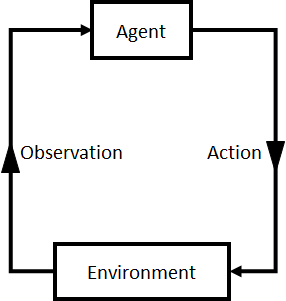

The agent executes an action in the environment, and then receives an observation as a result in the action. In goal-based contingent planning this loop continues until the agent ensures that the goal has been achieved. 

The CPOR package implements the SDR contingent (re)planner. SDR operates by translating the contingent problem into a classical problem, solving it using a classical solver, and then executing the resulting actions, if their preconditions hold. When an unexpected observation was received, SDR replans.

The code below demonstrates how SDR can be used, interacting with a simulated environment, which is also implemented inside the CPOR package. The while loop below implements the closed loop process.



In [11]:
import unified_planning.environment as environment
from unified_planning.shortcuts import ActionSelector

from up_cpor.simulator import SDRSimulator


env = environment.get_environment()
env.factory.add_engine('SDRPlanning', 'up_cpor.engine', 'SDRImpl')

with ActionSelector(name='SDRPlanning', problem=problem) as solver:
    simulatedEnv = SDRSimulator(problem)
    while not simulatedEnv.is_goal_reached():
        action = solver.get_action()
        observation = simulatedEnv.apply(action)
        solver.update(observation)
        if SOLUTION_PRINTED:
          print(f"Action: {action}")
          if observation:
            print(f"Observation: {observation}")
    print(f'{solver.name} found a valid plan!')
    print(f'Success')

  *** Credits ***
  * In operation mode `ActionSelector` at line 10 of `<ipython-input-11-254786c87001>`, you are using the following planning engine:
  * Engine name: SDR
  * Developers:  Guy Shani
  * Description: SDR is an online contingent replanner.
  *              It provides one action at a time, and then awaits to receive an observation from the environment.

Action: move(p1-3, p1-2)
Action: move(p1-2, p1-1)
Action: sense-door(p1-1, p2-1)
Observation: {opened(p2-1): false}
Action: move(p1-1, p1-2)
Action: move(p1-2, p1-3)
Action: move(p1-3, p1-4)
Action: move(p1-4, p1-5)
Action: sense-door(p1-5, p2-5)
Observation: {opened(p2-5): false}
Action: move(p1-5, p1-4)
Action: move(p1-4, p1-3)
Action: move(p1-3, p1-2)
Action: sense-door(p1-2, p2-2)
Observation: {opened(p2-2): true}
Action: move(p1-2, p2-2)
Action: move(p2-2, p3-2)
Action: move(p3-2, p3-1)
Action: sense-door(p3-1, p4-1)
Observation: {opened(p4-1): false}
Action: move(p3-1, p3-2)
Action: move(p3-2, p3-3)
Action: move(p3-

SDR can be used with any implemented environment, such as a real robot. Below we demonstrate how SDR can be used with a simulated environment implemented outside the CPOR package, as part of UP.

In [12]:
from unified_planning.io import PDDLReader
import unified_planning.environment as environment
from unified_planning.model.contingent.environment import SimulatedEnvironment
from unified_planning.shortcuts import ActionSelector

env = environment.get_environment()
env.factory.add_engine('SDRPlanning', 'up_cpor.engine', 'SDRImpl')

with ActionSelector(name='SDRPlanning', problem=problem) as solver:
    simulatedEnv = SimulatedEnvironment(problem)
    while not simulatedEnv.is_goal_reached():
        action = solver.get_action()
        observation = simulatedEnv.apply(action)
        solver.update(observation)
        if SOLUTION_PRINTED:
          print(f"Action: {action}")
          if observation:
            print(f"Observation: {observation}")
    print(f'{solver.name} found a valid plan!')
    print(f'Success')

  *** Credits ***
  * In operation mode `ActionSelector` at line 9 of `<ipython-input-12-097bc97026d1>`, you are using the following planning engine:
  * Engine name: SDR
  * Developers:  Guy Shani
  * Description: SDR is an online contingent replanner.
  *              It provides one action at a time, and then awaits to receive an observation from the environment.

Action: move(p1-3, p1-2)
Action: sense-door(p1-2, p2-2)
Observation: {opened(p2-2): false}
Action: move(p1-2, p1-3)
Action: move(p1-3, p1-4)
Action: sense-door(p1-4, p2-4)
Observation: {opened(p2-4): true}
Action: move(p1-4, p2-4)
Action: move(p2-4, p3-4)
Action: sense-door(p3-4, p4-4)
Observation: {opened(p4-4): false}
Action: move(p3-4, p3-3)
Action: move(p3-3, p3-2)
Action: sense-door(p3-2, p4-2)
Observation: {opened(p4-2): true}
Action: move(p3-2, p4-2)
Action: move(p4-2, p5-2)
Action: move(p5-2, p5-3)
SDRPlanning found a valid plan!
Success


/usr/local/lib/python3.10/dist-packages/unified_planning/engines/mixins/sequential_simulator.py:51: UserWarning: We cannot establish whether sequential_simulator is able to handle this problem!
  warn(msg)
/usr/local/lib/python3.10/dist-packages/unified_planning/engines/sequential_simulator.py:102: UserWarning: The Grounder used in the UPSequentialSimulator does not support the given problem
  warn(msg)
